In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U -q PyDrive

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#All imports and download for the whole project
!pip install wordcloud
import nltk
import numpy as np
import re 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import files
from nltk.corpus import wordnet
import pandas as pd
import io
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Analyzing how the Discussion of Climate Change has shifted from the 1980's to 2010

This notebook, in collaboration with a storyboard, will tell the story of how the discussion of increasing global average surface temperatures has changed over the past 30 years. More specifically, I will be using data from The New York Times Archives for the years 1980-2010 to analyze how the language and content changes.

The main questions we will explore:
- How have the themes surrounding the conversation of climate change shifted over the years?
- Was climate change misunderstood in the past?
- Is there overlap between how it is discussed today vs. in the past?
- How has the popularity of articles on climate change changed?

#Data Collection

For my data, I collected 25 articles for each decade (1980-1990, 1990-2000, 2000-2010) from The New York Times Archive. All of these articles were found under the topic "climate change." I used newspaper3k for web scraping these articles then imported them into a csv.


The steps are as follows: 
1. Download the latest version of Python
2. pip install newspaper3k
3. Write python script to scrape web pages (included in data folder of Google Drive)
4. Write the scrape output to csv 

In [ ]:
# Credit to https://www.linkedin.com/pulse/how-do-i-read-csv-file-from-google-drive-using-python-sigmundo/ for explaining how to import the csv file from my drive

downloaded = drive.CreateFile({'id':'1EAlJ1EQ4BpV-D2ZUdgQkE80yuUhByWBB'})
downloaded.GetContentFile('NYTArticles.csv')

In [ ]:
article_data = pd.read_csv('NYTArticles.csv')
article_data.head()

,Decade,Article1,Article2,Article3,Article4,Article5,Article6,Article7,Article8,Article9,Article10,Article11,Article12,Article13,Article14,Article15,Article16,Article17,Article18,Article19,Article20,Article21,Article22,Article23,Article24,Article25
0,1980s,Climatologists say that it may be several deca...,Analysis of the effects of a warmer and drier ...,"A cloud of volcanic debris stretching 13,000 m...","In his announcement, Dr. Sovern cited radical ...","A researcher at the University of Florida, stu...",Despite widespread hardships caused by recent ...,Gases Trap Infrared Radiation\r\n\r\nScientist...,Mankind's activities in increasing the amount ...,"Core Radius Is 2,190 Miles\r\n\r\nThe core rad...",Full text is unavailable for this digitized ar...,AGLOBAL strategy to reduce a potentially dange...,Plans for meeting future energy needs should c...,What can we really say about future climate? T...,"AFTER decades of neglect, environmental issues...",The average cow belches up to 400 liters of me...,"Dr. Hansen, a leading expert on climate, said ...","The report, prepared by the Pacific Northwest ...",As the global sea levels rise by one to three ...,"The nuclear industry, which has has seen the c...",VIRTUALLY all the carbon dioxide emitted by po...,"A. James Wagner, an analyst at the Weather Ser...",The two criteria that have determined the choi...,"Like glass in a greenhouse, these gases are tr...",One futuristic idea is to use giant lasers ato...,The cold war isn't over. But even as the polit...
1,1990s,But the research going on in the Alps is cruci...,The 'best estimate' is about a third lower tha...,Scientists working in Brazil have found the fi...,The report comes at a time when 142 countries ...,The modelers reply that these efficiencies can...,"The latest research extends a study last May, ...","'We appear to be veering off the target, and a...",The human contribution to global warming could...,The evidence mounted last week that man-made g...,American officials have concluded that the Uni...,"Nevertheless, the panel's conclusion marks a w...",The Chinese also are heavy users of such subst...,"Instead, the American manufacturers called for...",The original study of the ice cores showed wha...,"To the Editor:\r\n\r\nS. Fred Singer, in 'Glob...",To the Editor:\r\n\r\nYour Sept. 10 front-page...,"Mr. Karl, who has been agnostic on the questio...","What Was Known\r\n\r\nYears of Research, Littl...",Developing countries make essentially a moral ...,''This paper goes way beyond what has been sho...,Since cutting carbon dioxide emissions would h...,"To the Editor:\r\n\r\nAstonishingly, the recen...",Leaders of environmental groups criticized the...,The information provided by the three groups i...,STUDYING a coral reef among the islands of Ind...
2,2000s,"SYDNEY — This was a good, if distant, vantage ...",COPENHAGEN  On any list of tough sales jobs i...,Whether it’s the manufacturer of the environme...,The glaciers that have long provided water and...,BRUSSELS — European Union leaders agreed on Fr...,'Our goal is to change weathercasts into envir...,In an early indication that the Copenhagen acc...,"BEIJING  Chinese officials, stung by criticis...","Peterborough, England\r\n\r\nFOR the many disa...","The Copenhagen conference, which ended without...",1:14\r\n\r\nChinese Astronauts Arrive at Space...,The price per metric ton of permits to spew ca...,That elsewhere will likely be a much smaller g...,China Presents ‘Challenges’ NATO Chief Says\r\...,"'He was in a hurry home, he said, because they...",The choice of an appropriate social time disco...,"The Inter-American Commission on Human Rights,...",Two miles per gallon may mean nothing more tha...,When you think about the growth of human popul...,'This cottage industry has the potential to be...,"POZNAN, Poland  As ministers from 189 countri...","Along with Jane Mayer of The New Yorker, the o...",CONSERVATIVES don’t support tax increases that...,"In an interview, Dr. Hol

#Text Analysis


Before I could perform text analysis on the articles, I had to preprocess the data and clean it so it could be worked with more easily. In this process I got standardized the text, used lemmatization, used NLTK to filter out stopwords, used tokenization, etc. This allows for text analysis such as finding word count to be done easily.

In [ ]:
list_of_columns = []
for i in range(1, 26):
  list_of_columns.append("Article"+str(i))

cleaned_data = pd.DataFrame()

cleaned_data["Decade"] = article_data["Decade"]

for column in list_of_columns:
  cleaned_data[column] = article_data[column].str.lower().str.replace('[^\w\s]','').str.replace('(\\r)|(\\n)',' ')

cleaned_data

,Decade,Article1,Article2,Article3,Article4,Article5,Article6,Article7,Article8,Article9,Article10,Article11,Article12,Article13,Article14,Article15,Article16,Article17,Article18,Article19,Article20,Article21,Article22,Article23,Article24,Article25
0,1980s,climatologists say that it may be several deca...,analysis of the effects of a warmer and drier ...,a cloud of volcanic debris stretching 13000 mi...,in his announcement dr sovern cited radical cl...,a researcher at the university of florida stud...,despite widespread hardships caused by recent ...,gases trap infrared radiation scientists ha...,mankinds activities in increasing the amount o...,core radius is 2190 miles the core radius i...,full text is unavailable for this digitized ar...,aglobal strategy to reduce a potentially dange...,plans for meeting future energy needs should c...,what can we really say about future climate th...,after decades of neglect environmental issues ...,the average cow belches up to 400 liters of me...,dr hansen a leading expert on climate said ear...,the report prepared by the pacific northwest l...,as the global sea levels rise by one to three ...,the nuclear industry which has has seen the ca...,virtually all the carbon dioxide emitted by po...,a james wagner an analyst at the weather servi...,the two criteria that have determined the choi...,like glass in a greenhouse these gases are tra...,one futuristic idea is to use giant lasers ato...,the cold war isnt over but even as the politic...
1,1990s,but the research going on in the alps is cruci...,the best estimate is about a third lower than ...,scientists working in brazil have found the fi...,the report comes at a time when 142 countries ...,the modelers reply that these efficiencies can...,the latest research extends a study last may a...,we appear to be veering off the target and a g...,the human contribution to global warming could...,the evidence mounted last week that manmade ga...,american officials have concluded that the uni...,nevertheless the panels conclusion marks a wat...,the chinese also are heavy users of such subst...,instead the american manufacturers called for ...,the original study of the ice cores showed wha...,to the editor s fred singer in global warmi...,to the editor your sept 10 frontpage articl...,mr karl who has been agnostic on the question ...,what was known years of research little pro...,developing countries make essentially a moral ...,this paper goes way beyond what has been shown...,since cutting carbon dioxide emissions would h...,to the editor astonishingly the recent stor...,leaders of environmental groups criticized the...,the information provided by the three groups i...,studying a coral reef among the islands of ind...
2,2000s,sydney this was a good if distant vantage poi...,copenhagen on any list of tough sales jobs in...,whether its the manufacturer of the environmen...,the glaciers that have long provided water and...,brussels european union leaders agreed on fri...,our goal is to change weathercasts into enviro...,in an early indication that the copenhagen acc...,beijing chinese officials stung by criticism ...,peterborough england for the many disappoin...,the copenhagen conference which ended without ...,114 chinese astronauts arrive at space stat...,the price per metric ton of permits to spew ca...,that elsewhere will likely be a much smaller g...,china presents challenges nato chief says i...,he was in a hurry home he said because they we...,the choice of an appropriate social time disco...,the interamerican commission on human rights a...,two miles per gallon may mean nothing more tha...,when you think about the growth of human popul...,this cottage industry has the potential to bec...,poznan poland as ministers from 189 countries...,along with jane mayer of the new yorker the ot...,conservatives dont support tax increases that ...,in an interview dr holdren a 64yearold physici...,just at the time that the us is finally reenga...


In [ ]:
def remove_stopwords(text_name):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in text_name:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [ ]:
article_80s = ''

for column in list_of_columns:
  article_80s += cleaned_data[column][0] + " "

article_80s = remove_stopwords(nltk.word_tokenize(article_80s))


article_90s = ''

for column in list_of_columns:
  article_90s += cleaned_data[column][1] + " "

article_90s = remove_stopwords(nltk.word_tokenize(article_90s))


article_00s = ''

for column in list_of_columns:
  article_00s += cleaned_data[column][2] + " "

article_00s = remove_stopwords(nltk.word_tokenize(article_00s))

In [ ]:
lemmatizer = WordNetLemmatizer()

lemmatized_words_80s = []

for word in article_80s:
  lemmatized_words_80s.append(lemmatizer.lemmatize(word))

lemmatized_words_90s = []

for word in article_90s:
  lemmatized_words_90s.append(lemmatizer.lemmatize(word))

lemmatized_words_00s = []

for word in article_00s:
  lemmatized_words_00s.append(lemmatizer.lemmatize(word))

In [ ]:
#shows count for each word from the 1980s
freq_80s = Counter(lemmatized_words_80s) 
themes_80s = freq_80s.most_common(20)
print(themes_80s)

[('climate', 55), ('would', 53), ('year', 42), ('carbon', 40), ('change', 40), ('dioxide', 37), ('said', 34), ('warming', 31), ('could', 28), ('energy', 25), ('effect', 25), ('greenhouse', 25), ('atmosphere', 24), ('ozone', 24), ('state', 23), ('gas', 23), ('dr', 23), ('fuel', 22), ('percent', 22), ('earth', 21)]


In [ ]:
#shows count for each word from the 1990s
freq_90s = Counter(lemmatized_words_90s) 
themes_90s = freq_90s.most_common(20)
print(themes_90s)

[('said', 49), ('climate', 42), ('year', 38), ('warming', 36), ('report', 36), ('emission', 36), ('would', 35), ('global', 32), ('carbon', 30), ('scientist', 29), ('say', 28), ('change', 27), ('world', 25), ('dioxide', 25), ('united', 25), ('state', 25), ('gas', 24), ('panel', 24), ('temperature', 24), ('group', 20)]


In [ ]:
#shows count for top 20 words from the 2000s
freq_00s = Counter(lemmatized_words_00s)
themes_00s = freq_00s.most_common(20)
print(themes_00s)

[('climate', 47), ('said', 44), ('emission', 36), ('carbon', 30), ('change', 29), ('global', 25), ('country', 25), ('nation', 25), ('copenhagen', 24), ('year', 23), ('would', 22), ('percent', 20), ('new', 19), ('mr', 18), ('time', 18), ('warming', 17), ('like', 17), ('united', 16), ('energy', 15), ('state', 15)]


#Word Clouds


In order to visualize the overall themes from each decade, I will be using word clouds to display the most common words that appear in the articles from each decade. Larger words indicate more instances of these words within the articles.

(-0.5, 399.5, 349.5, -0.5)

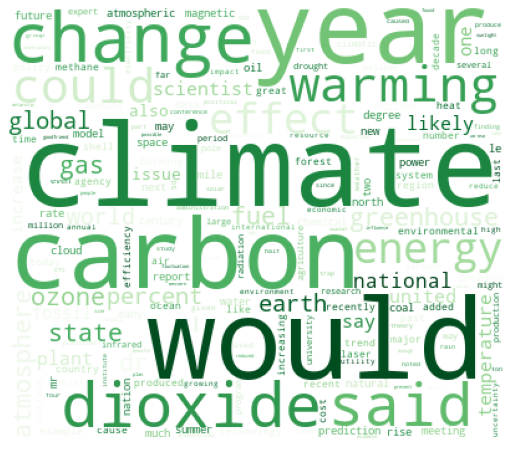

In [ ]:
#generates word cloud for 80s article data
#credit to Chloe Akazawa for the code from her 2020 DIG HUM project

wc = WordCloud(width=400, height=350, background_color='white', 
           colormap='Greens')
wc.generate_from_frequencies(freq_80s)

plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')
#credit to https://www.datacamp.com/community/tutorials/wordcloud-python
#color credit https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

(-0.5, 399.5, 349.5, -0.5)

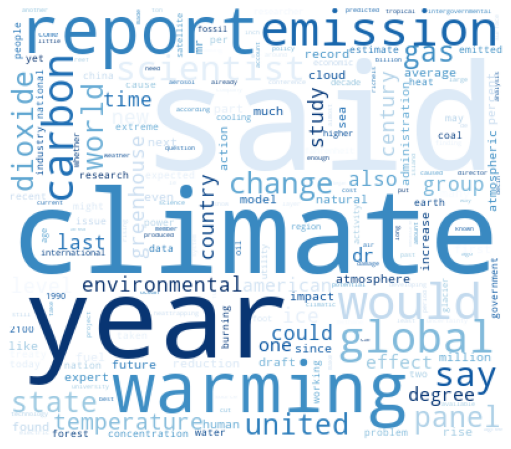

In [ ]:
#generates word cloud for 90s article data
wc = WordCloud(width=400, height=350, background_color='white', 
           colormap='Blues')
wc.generate_from_frequencies(freq_90s)

plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')
#credit to https://www.datacamp.com/community/tutorials/wordcloud-python
#color credit https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

(-0.5, 399.5, 349.5, -0.5)

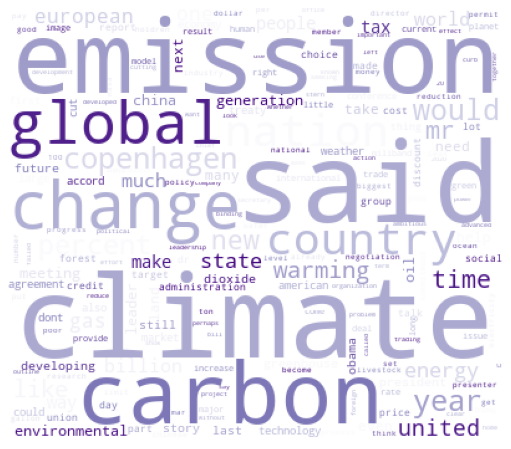

In [ ]:
#generates word cloud for 00s article data
wc = WordCloud(width=400, height=350, background_color='white', 
           colormap='Purples')
wc.generate_from_frequencies(freq_00s)

plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')
#credit to https://www.datacamp.com/community/tutorials/wordcloud-python
#color credit https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

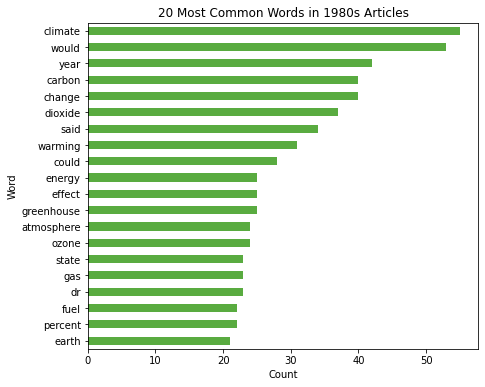

In [ ]:
#create bar chart displaying count for each word from articles in the 1980s

eighties_barplot = pd.DataFrame(themes_80s, columns = ["Word", "Count"])

barplot_ax = eighties_barplot.plot.barh(x = "Word", y = "Count", figsize = (7,6), color = "#59ab40", legend=None)
barplot_ax.set(title="20 Most Common Words in 1980s Articles", xlabel="Count", )
barplot_ax.invert_yaxis()
fig_barplot = barplot_ax.get_figure() # get figure associated with ax object
#credit https://stackoverflow.com/questions/28022227/sorted-bar-charts-with-pandas-matplotlib-or-seaborn and Chloe Akazawa

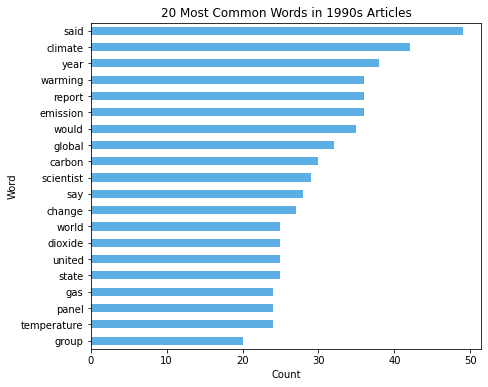

In [ ]:
#create bar chart displaying count for each word from articles in the 1990s

nineties_barplot = pd.DataFrame(themes_90s, columns = ["Word", "Count"])

barplot_ax = nineties_barplot.plot.barh(x = "Word", y = "Count", figsize = (7,6), color = "#5bafe5", legend=None)
barplot_ax.set(title="20 Most Common Words in 1990s Articles", xlabel="Count")
barplot_ax.invert_yaxis()
fig_barplot = barplot_ax.get_figure() # get figure associated with ax object

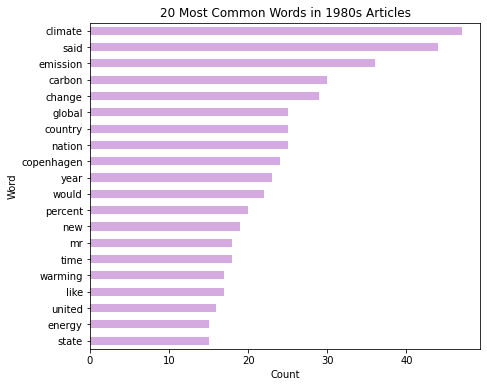

In [ ]:
#create bar chart displaying count for each word from articles in the 2000s

thousands_barplot = pd.DataFrame(themes_00s, columns = ["Word", "Count"])

barplot_ax = thousands_barplot.plot.barh(x = "Word", y = "Count", figsize = (7,6), color = "#D4aae1", legend=None)
barplot_ax.set(title="20 Most Common Words in 1980s Articles", xlabel="Count")
barplot_ax.invert_yaxis()
fig_barplot = barplot_ax.get_figure() # get figure associated with ax object

#Article Count

In order to see if the discussion around climate change has increased in popularity and at what rate, I wanted to create a graph showing the number of search results for "climate change" in the NYT archives. This was plotted for each year between 1980-2010. 

In [ ]:
downloaded_count = drive.CreateFile({'id':'1WGFIkRVvEKtm4QZ-_8-_zqame9ffIAaC'})
downloaded_count.GetContentFile('Yearly Article Count.csv')

In [ ]:
#importing csv file of article count as pandas dataframe
count_data = pd.read_csv('Yearly Article Count.csv')
count_data.head()

,Year,Number of Articles
0,1980,266
1,1981,500
2,1982,501
3,1983,432
4,1984,464


In [ ]:
#create line graph of number of artticles found under search input "climate change" for each year

import plotly.express as px

fig = px.line(count_data, x='Year', y='Number of Articles', title='NYT Climate Change Article Count')
fig

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
eighties = article_data.take(1)
nineties = article_data.take(2)
two_thousands = article_data.take(3)